In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
# Write .tsv file with all the columns
df_merged = pd.read_csv('annot/S1_accessible_sites/atac_wt_glp1.bed',
            names=['chrom', 'start', 'end', 'name', 'score', 'atac_mode', 'atac_source'], sep='\t', comment='#')
print('%s accessible sites' % (yp.f_uk(len(df_merged)),))

42,245 accessible sites


In [3]:
l_ = list(sorted(set(config['stages_rep'] + list(config['atac808'].keys()))))
for stage in itertools.islice(l_, None):
    print(stage)
    step = 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all'
    fp_ = pf('atac808_%(stage)s' % locals(), step, '_treat_pileup.bw', 'atac808')
    print(os.path.isfile(fp_))
    df_merged['atac_%(stage)s_height' % locals()] = list(map(np.nanmean, yp.read_regions(fp_, df_merged.chrom.tolist(), df_merged.start.tolist(), df_merged.end.tolist())))

glp1_d13_rep1
True
glp1_d13_rep1a
True
glp1_d13_rep1b
True
glp1_d13_rep1c
True


/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


glp1_d13_rep1d
True
glp1_d13_rep1e
True
glp1_d13_rep1f
True
glp1_d13_rep2
True
glp1_d13_rep2a
True
glp1_d13_rep2b
True
glp1_d13_rep2c
True
glp1_d1_rep1
True
glp1_d1_rep1a
True
glp1_d1_rep1b
True
glp1_d1_rep1c
True
glp1_d1_rep2
True
glp1_d1_rep2a
True
glp1_d1_rep2b
True
glp1_d2_rep1
True
glp1_d2_rep1a
True
glp1_d2_rep1b
True
glp1_d2_rep1c
True
glp1_d2_rep2
True
glp1_d2_rep2a
True
glp1_d2_rep2b
True
glp1_d2_rep2c
True
glp1_d6_rep1
True
glp1_d6_rep1a
True
glp1_d6_rep1b
True
glp1_d6_rep1c
True
glp1_d6_rep2
True
glp1_d9_rep1
True
glp1_d9_rep1a
True
glp1_d9_rep1b
True
glp1_d9_rep1c
True
glp1_d9_rep2
True
gon2gem1_d1_rep1a
True
gon2gem1_d1_rep1b
True
gon2gem1_d1_rep2a
True
gon2gem1_d1_rep2b
True
gon2gem1_d2_rep1a
True
gon2gem1_d2_rep1b
True
gon2gem1_d2_rep2a
True
gon2gem1_d2_rep2b
True
wt_emb_rep1
True
wt_emb_rep2
True
wt_l1_rep1
True
wt_l1_rep2
True
wt_l2_rep1
True
wt_l2_rep2
True
wt_l2_rep2a
True
wt_l2_rep2b
True
wt_l3_rep1
True
wt_l3_rep1a
True
wt_l3_rep1b
True
wt_l3_rep1c
True
wt_l3_rep2


Text(0.5,0,'Correlation distance')

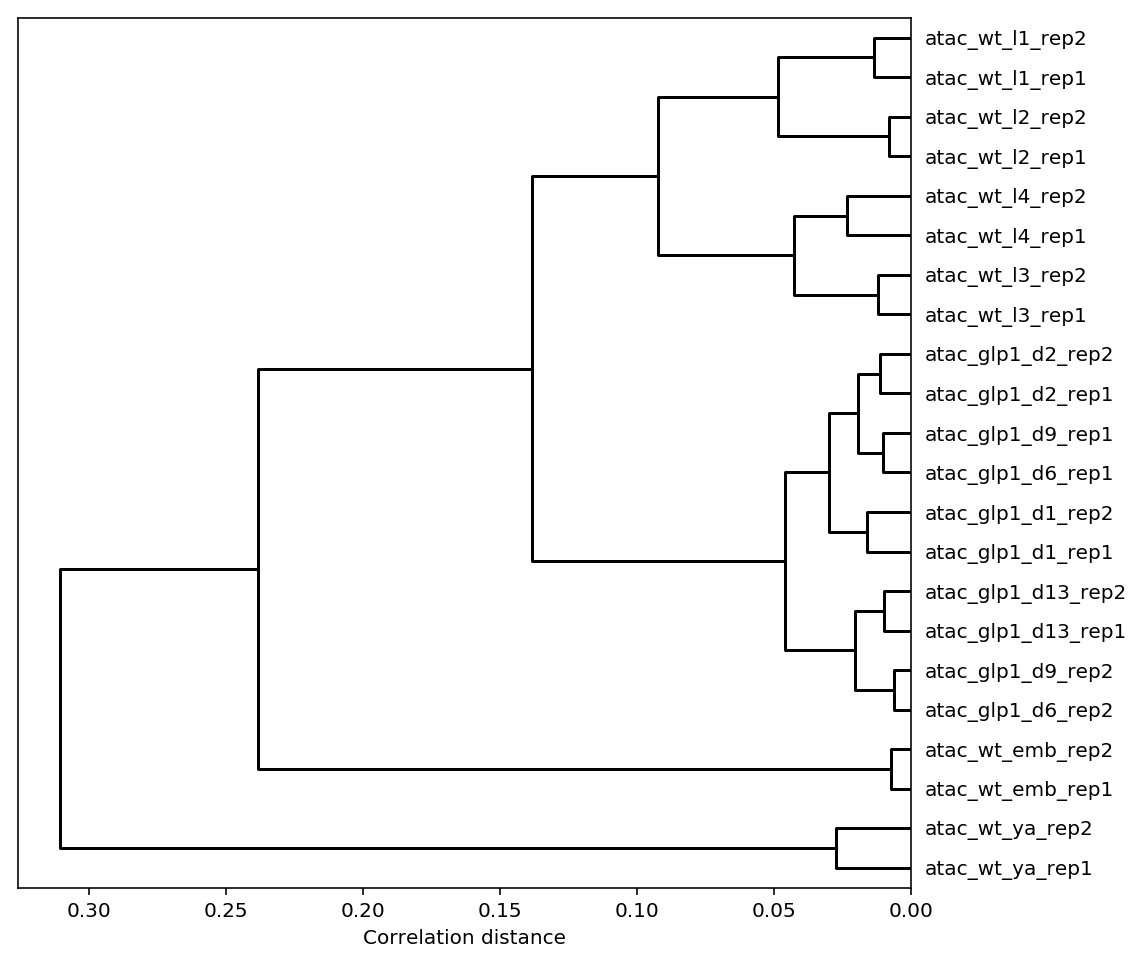

In [4]:
df_merged['atac_max_height'] = df_merged[['atac_%(stage)s_height' % locals() for stage in config['stages_rep']]].max(axis=1)
df_merged['atac_max_rank'] = df_merged['atac_max_height'].rank(ascending=False)

#.query('(0 <= atac_max_rank) & (atac_max_rank <= 10000)')
counts_ = df_merged[['atac_%s_height' % (ll,) for ll in config['stages_rep']]].values.T
linkage_matrix = sp.cluster.hierarchy.linkage(counts_, metric='correlation', method='complete')
plt.figure(figsize=(8,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=['atac_%s' % (ll,) for ll in config['stages_rep']], orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')
#plt.savefig('annot/FigA_clustering/reproducibility_atac.pdf', bbox_inches='tight')

In [5]:
#counts_ = df_merged[['atac_%s_height' % (ll,) for ll in l_]].values.T
#linkage_matrix = sp.cluster.hierarchy.linkage(np.nan_to_num(counts_), metric='correlation', method='complete')
#plt.figure(figsize=(8,24))
#r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=['atac_%s_height' % (ll,) for ll in l_], orientation='left', 
#                                  color_threshold=-1.0, above_threshold_color='k', leaf_font_size=11)
#plt.gca().set_xlabel('Correlation distance')
#plt.savefig('annot/FigA_clustering/reproducibility_atac_all.pdf', bbox_inches='tight')

Text(0.5,0,'Correlation distance')

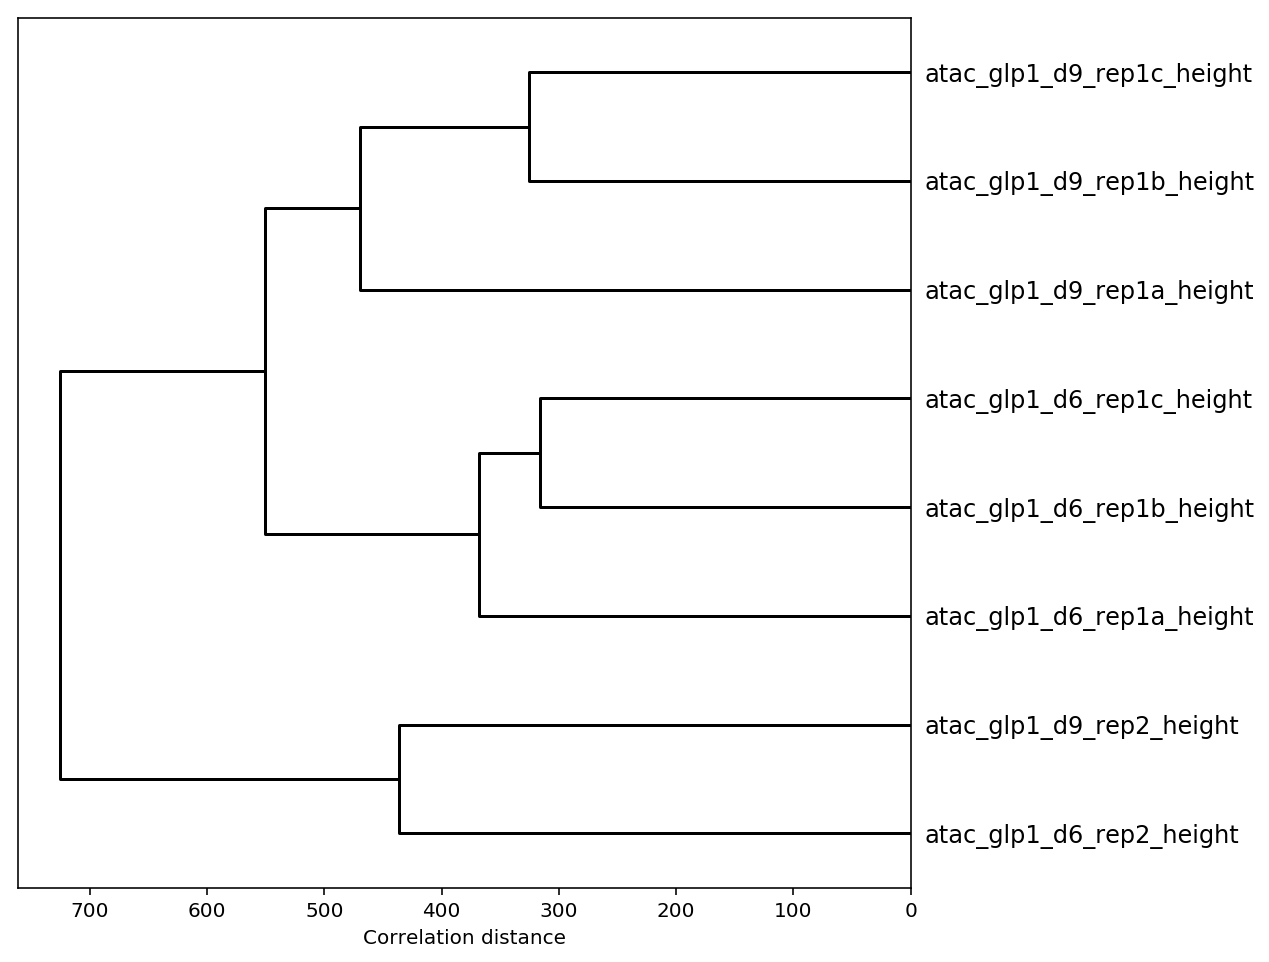

In [92]:
l_glp1_ = [
    'glp1_d6_rep1a',
    'glp1_d6_rep1b',
    'glp1_d6_rep1c',
    'glp1_d6_rep2',
    'glp1_d9_rep1a',
    'glp1_d9_rep1b',
    'glp1_d9_rep1c',
    'glp1_d9_rep2',
]

counts_ = df_merged[['atac_%s_height' % (ll,) for ll in l_glp1_]].values.T
linkage_matrix = sp.cluster.hierarchy.linkage(np.nan_to_num(counts_), metric='correlation')
plt.figure(figsize=(8,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=['atac_%s_height' % (ll,) for ll in l_glp1_], orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')
#plt.savefig('annot/FigA_clustering/reproducibility_atac_d6_d9.pdf', bbox_inches='tight')

In [7]:
df_regl = regl_addons()

7076 non-promoters outside of outron/gene body (=no gene_id)


/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


13195 of 42245 sites with CV values via promoter annotation
32525 of 42245 sites with CV values via "associated gene"


In [82]:
df_prom = pd.read_csv('annot/S2_regulatory_annotation/S2b_promoter_annotation_6Dec17.tsv', sep='\t')
#df_prom

In [83]:
#sorted(set(config['stages_rep'] + list(config['atac808'].keys())))
l_atac_glp1 = [
    'glp1_d1_rep1',
    'glp1_d1_rep1a',
    'glp1_d1_rep1b',
    'glp1_d1_rep1c',
    'glp1_d1_rep2',
    'glp1_d1_rep2a',
    'glp1_d1_rep2b',
    'glp1_d2_rep1',
    'glp1_d2_rep1a',
    'glp1_d2_rep1b',
    'glp1_d2_rep1c',
    'glp1_d2_rep2',
    'glp1_d2_rep2a',
    'glp1_d2_rep2b',
    'glp1_d2_rep2c',
    'glp1_d6_rep1',
    'glp1_d6_rep1a',
    'glp1_d6_rep1b',
    'glp1_d6_rep1c',
    'glp1_d6_rep2',
    'glp1_d9_rep1',
    'glp1_d9_rep1a',
    'glp1_d9_rep1b',
    'glp1_d9_rep1c',
    'glp1_d9_rep2',
    'glp1_d13_rep1',
    'glp1_d13_rep1a',
    'glp1_d13_rep1b',
    'glp1_d13_rep1c',
    'glp1_d13_rep1d',
    'glp1_d13_rep1e',
    'glp1_d13_rep1f',
    'glp1_d13_rep2',
    'glp1_d13_rep2a',
    'glp1_d13_rep2b',
    'glp1_d13_rep2c',
]

for atac_glp1 in itertools.islice(l_atac_glp1, None):
    print(atac_glp1)
    step = 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all'
    fp_ = pf('atac808_%(atac_glp1)s' % locals(), step, '_treat_pileup.bw', 'atac808')
    print(os.path.isfile(fp_))
    df_prom[atac_glp1] = list(map(np.nanmean, yp.read_regions(fp_, df_prom.chrom.tolist(), df_prom.start.tolist(), df_prom.end.tolist())))
    

glp1_d1_rep1
True
glp1_d1_rep1a
True
glp1_d1_rep1b
True
glp1_d1_rep1c
True
glp1_d1_rep2
True
glp1_d1_rep2a
True
glp1_d1_rep2b
True
glp1_d2_rep1
True
glp1_d2_rep1a
True
glp1_d2_rep1b
True
glp1_d2_rep1c
True
glp1_d2_rep2
True
glp1_d2_rep2a
True
glp1_d2_rep2b
True
glp1_d2_rep2c
True
glp1_d6_rep1
True
glp1_d6_rep1a
True
glp1_d6_rep1b
True
glp1_d6_rep1c
True
glp1_d6_rep2
True
glp1_d9_rep1
True
glp1_d9_rep1a
True
glp1_d9_rep1b
True
glp1_d9_rep1c
True
glp1_d9_rep2
True
glp1_d13_rep1
True
glp1_d13_rep1a
True
glp1_d13_rep1b
True
glp1_d13_rep1c
True
glp1_d13_rep1d
True
glp1_d13_rep1e
True
glp1_d13_rep1f
True
glp1_d13_rep2
True
glp1_d13_rep2a
True
glp1_d13_rep2b
True
glp1_d13_rep2c
True


In [84]:
l_lcap_glp1 = [
    'glp1_d1_rep1',
    'glp1_d1_rep2',
    'glp1_d2_rep1',
    'glp1_d2_rep2',
    'glp1_d6_rep1',
    'glp1_d6_rep2',
    'glp1_d9_rep1',
    'glp1_d9_rep2',
    'glp1_d13_rep1',
    'glp1_d13_rep2',
]

l_lcap_df = []
for lcap_glp1 in itertools.islice(l_lcap_glp1, None):
    print(lcap_glp1)
    step = 'trim20.bwa_pe.rm_unmapped_pe.rm_chrM.rm_rRNA_broad.rm_blacklist.rm_q10.htseq_counts'
    fp_ = pf('lcap808_%(lcap_glp1)s' % locals(), step, '.tsv', 'lcap808')
    print(os.path.isfile(fp_))
    l_lcap_df.append(pd.read_csv(fp_, sep='\t', names=['gene_id', 'lcap_' + lcap_glp1], index_col='gene_id'))

df_lcap = pd.concat(l_lcap_df, axis=1)

glp1_d1_rep1
True
glp1_d1_rep2
True
glp1_d2_rep1
True
glp1_d2_rep2
True
glp1_d6_rep1
True
glp1_d6_rep2
True
glp1_d9_rep1
True
glp1_d9_rep2
True
glp1_d13_rep1
True
glp1_d13_rep2
True


In [85]:
df_join = df_prom.merge(df_lcap, left_on='gene_id', right_index=True)

In [86]:
df__ = collections.OrderedDict()
for atac_glp1 in itertools.islice(l_atac_glp1, None):
    df__[atac_glp1] = collections.OrderedDict()
    for lcap_glp1 in itertools.islice(l_lcap_glp1, None):
        corr_ = sp.stats.spearmanr(df_join[atac_glp1], df_join['lcap_' + lcap_glp1]).correlation
        #print(atac_glp1, 'lcap_' + lcap_glp1, corr_)
        df__[atac_glp1]['lcap_' + lcap_glp1] = corr_

pd.DataFrame.from_dict(df__, orient='index')[[
    'lcap_glp1_d6_rep1',
    'lcap_glp1_d6_rep2',
    'lcap_glp1_d9_rep1',
    'lcap_glp1_d9_rep2',
    'lcap_glp1_d13_rep1',
    'lcap_glp1_d13_rep2',
]]

,lcap_glp1_d6_rep1,lcap_glp1_d6_rep2,lcap_glp1_d9_rep1,lcap_glp1_d9_rep2,lcap_glp1_d13_rep1,lcap_glp1_d13_rep2
glp1_d13_rep1,0.395662,0.387215,0.405662,0.404926,0.421392,0.418748
glp1_d13_rep1a,0.370242,0.362143,0.379325,0.378866,0.394328,0.392479
glp1_d13_rep1b,0.385780,0.377092,0.395505,0.394810,0.411391,0.408743
glp1_d13_rep1c,0.366505,0.358260,0.376564,0.375659,0.391494,0.388677
glp1_d13_rep1d,0.381593,0.373049,0.391841,0.390911,0.407450,0.404880
glp1_d13_rep1e,0.396121,0.387702,0.406186,0.405317,0.421735,0.419195
glp1_d13_rep1f,0.390986,0.382763,0.400729,0.400400,0.416658,0.414049
glp1_d13_rep2,0.393570,0.384925,0.401425,0.401673,0.416945,0.417163
glp1_d13_rep2a,0.391436,0.382722,0.398951,0.399215,0.414168,0.414502
glp1_d13_rep2b,0.390889,0.382332,0.398807,0.398993,0.414332,0.414363


Text(0.5,0,'Correlation distance')

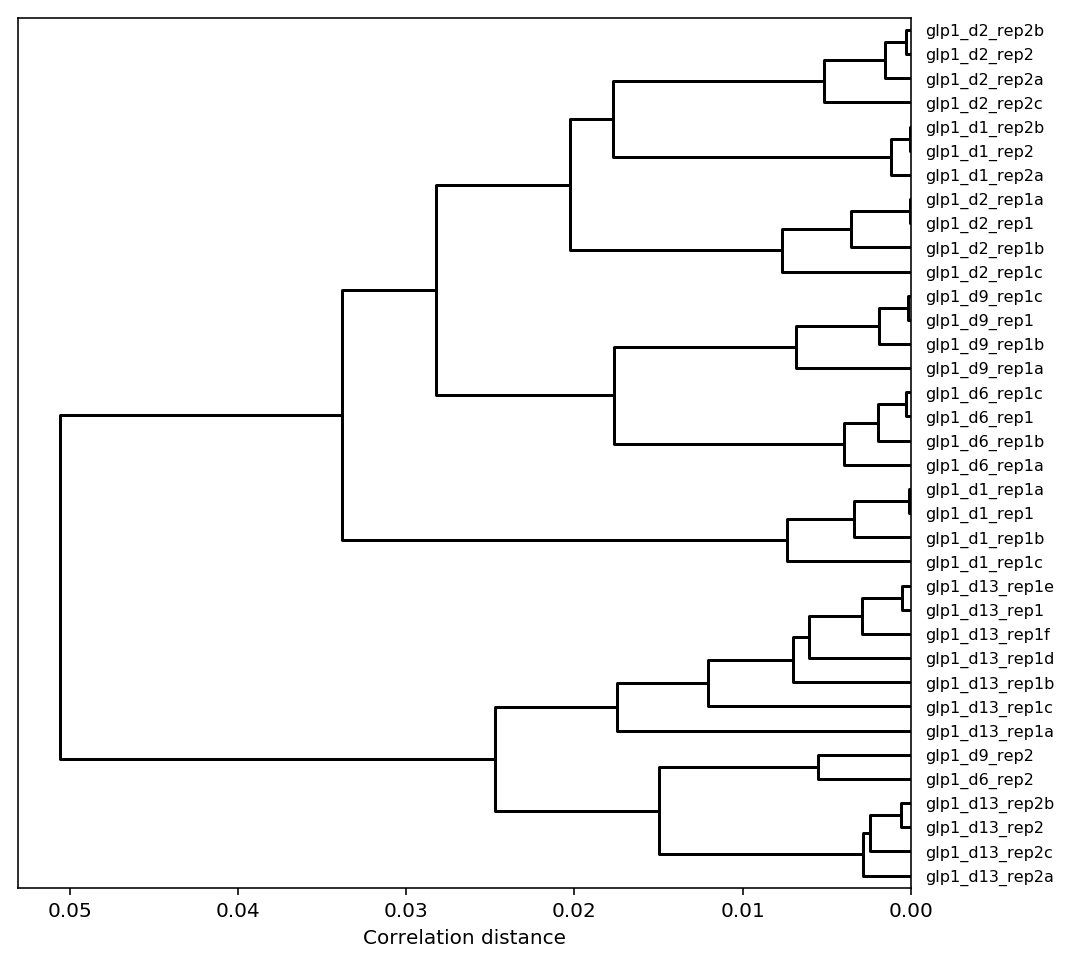

In [91]:
#df_merged['atac_max_height'] = df_merged[['atac_%(stage)s_height' % locals() for stage in config['stages_rep']]].max(axis=1)
#df_merged['atac_max_rank'] = df_merged['atac_max_height'].rank(ascending=False)

#.query('(0 <= atac_max_rank) & (atac_max_rank <= 10000)')
counts_ = df_join[l_atac_glp1].values.T
linkage_matrix = sp.cluster.hierarchy.linkage(counts_, metric='correlation', method='complete')
plt.figure(figsize=(8,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=df_join[l_atac_glp1].columns, orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')
#plt.savefig('annot/FigA_clustering/reproducibility_atac.pdf', bbox_inches='tight')